In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('used_cars.csv')

In [4]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [9]:
X=df["model_year"]
y=df["price"]


In [15]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [12]:
X.head(5)

0    2013
1    2021
2    2022
3    2015
4    2021
Name: model_year, dtype: int64

In [13]:
y= y.str[1:]
y= y.str.replace(",", "").astype(int)

In [16]:
y

0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 4009, dtype: int32

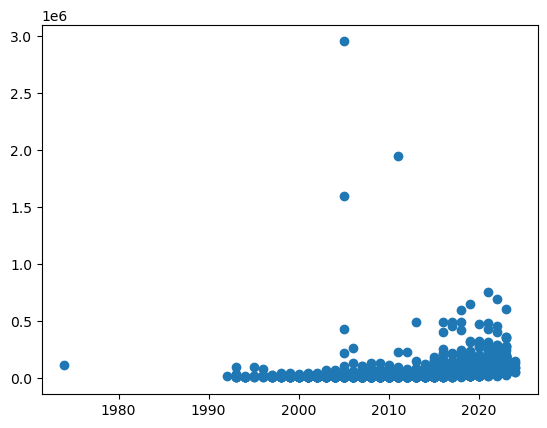

In [18]:
plt.scatter(X,y)

In [19]:
TRAIN_RATIO = 0.8
TEST_RATIO = 0.2

In [20]:
X_Normalized = (X-X.min())/(X.max()-X.min())
y_Normalized = (y-y.min())/(y.max()-y.min())

In [27]:
X_train = X_Normalized[:int(TRAIN_RATIO * len(X_Normalized))]
X_test = X_Normalized[int(TRAIN_RATIO * len(X_Normalized)):]
y_train = y_Normalized[:int(TRAIN_RATIO * len(y_Normalized))]
y_test = y_Normalized[int(TRAIN_RATIO * len(y_Normalized)):]

In [28]:
X_train

0       0.78
1       0.94
2       0.96
3       0.82
4       0.94
        ... 
3202    0.62
3203    0.92
3204    0.92
3205    0.92
3206    0.92
Name: model_year, Length: 3207, dtype: float64

In [29]:
X_test

3207    0.96
3208    0.96
3209    0.96
3210    0.92
3211    0.94
        ... 
4004    0.98
4005    0.96
4006    0.96
4007    0.92
4008    0.92
Name: model_year, Length: 802, dtype: float64

In [24]:
y_train

0       0.002812
1       0.012196
2       0.017817
3       0.004573
4       0.011178
          ...   
3202    0.001592
3203    0.008706
3204    0.013719
3205    0.015074
3206    0.013414
Name: price, Length: 3207, dtype: float64

In [25]:
y_test

801     0.009146
802     0.006775
803     0.001693
804     0.006090
805     0.006433
          ...   
4004    0.117866
4005    0.017581
4006    0.030148
4007    0.020663
4008    0.012872
Name: price, Length: 3208, dtype: float64

In [30]:
train_examples = list(zip(X_train.values ,y_train.values))
test_examples = list(zip(X_test.values , y_test.values))

In [32]:
def phi(x):
    return np.array([x,1])  #feature vector [0,0].T @ [x,1] dùng để * với w transpose 


def initialWeightVector():
    return np.ones(2) #w = [0,0]

def trainloss(w):
    return (1.0 / len(train_examples)) * sum((w.dot(phi(x_i))-y_i)**2 for x_i , y_i in train_examples)

def gradientTrainloss(w):
    return (1.0 / len(train_examples)) * sum(2*(w.dot(phi(x_i))-y_i)* phi(x_i) for x_i , y_i in train_examples)

def gradientDescent(L, gradientL , initialWeightVector,lr=0.01 , max_iters = 2000 , step =2):
    w= initialWeightVector()
    history = []
    for i in range(max_iters):
        value = L(w)
        gradient = gradientL(w)
        w_new = w- lr * gradient
        history.append(value)
        if i % step == 0:
            grad_norm = np.linalg.norm(gradient)
            print(f"Epoch {i}: Weight Vector = {w} , Trainloss = {value:.6f},Gradient_norm = {grad_norm:.6f}")
        w = w_new
    return w,history

In [33]:
w,history = gradientDescent(trainloss,gradientTrainloss,initialWeightVector, lr=0.001 , max_iters= 2000,step=100)

Epoch 0: Weight Vector = [1. 1.] , Trainloss = 3.314159,Gradient_norm = 4.742534
Epoch 100: Weight Vector = [0.74111773 0.69150598] , Trainloss = 1.679460,Gradient_norm = 3.375626
Epoch 200: Weight Vector = [0.55682101 0.47195252] , Trainloss = 0.851279,Gradient_norm = 2.402692
Epoch 300: Weight Vector = [0.4256126  0.31570485] , Trainloss = 0.431701,Gradient_norm = 1.710181
Epoch 400: Weight Vector = [0.33219127 0.20451672] , Trainloss = 0.219131,Gradient_norm = 1.217267
Epoch 500: Weight Vector = [0.26566597 0.12540089] , Trainloss = 0.111438,Gradient_norm = 0.866423
Epoch 600: Weight Vector = [0.21828469 0.06911333] , Trainloss = 0.056877,Gradient_norm = 0.616701
Epoch 700: Weight Vector = [0.18452973 0.02907436] , Trainloss = 0.029235,Gradient_norm = 0.438954
Epoch 800: Weight Vector = [0.16047372 0.00060072] , Trainloss = 0.015231,Gradient_norm = 0.312439
Epoch 900: Weight Vector = [ 0.14332126 -0.01964104] , Trainloss = 0.008136,Gradient_norm = 0.222389
Epoch 1000: Weight Vector 

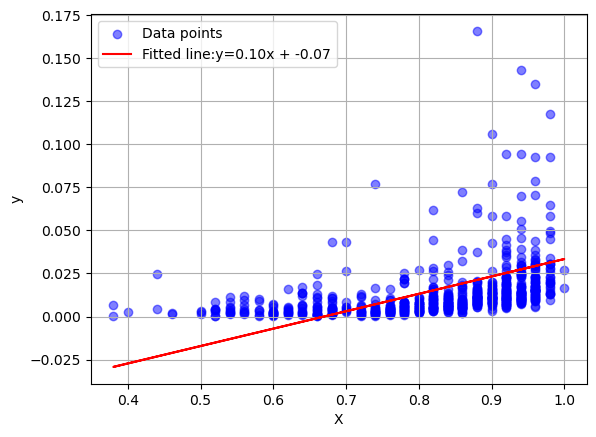

In [38]:
plt.scatter(X_test,y_test, color = 'blue',label= 'Data points',alpha=   0.5)
y_predict = w[0] * X_test +w[1]
plt.plot(X_test,y_predict,color= 'red',label =f'Fitted line:y={w[0]:.2f}x + {w[1]:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()         

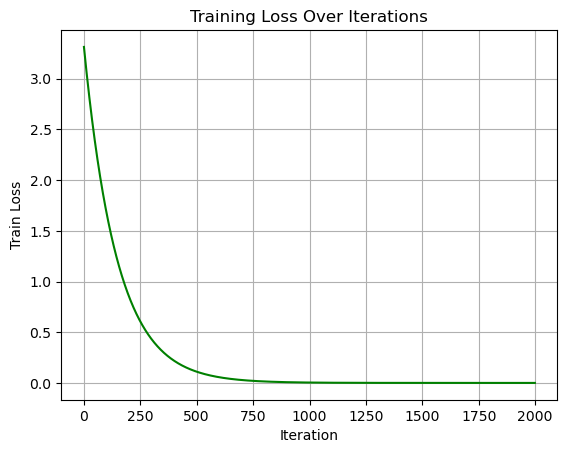

In [39]:
plt.plot(history,color='green')
plt.xlabel('Iteration')
plt.ylabel('Train Loss')
plt.title('Training Loss Over Iterations')
plt.grid(True)
plt.show()